In [1]:
%matplotlib inline
from glob import glob
import re
import networkx as nx
import matplotlib.pyplot as plt

In [43]:
def get_deps():
    deps = {}
    modules = glob('*.js')
    for module in modules:
        s = open(module).read()
        deps[module[:-3]] = re.findall(r'''require[(]["'][.]?[//]?(\w+)[.]?j?s?''', s) or []
    return deps

def without_tests(deps):
    return {k: v for k, v in deps.items() if 'test_' not in k}

def remove_leaves(all_deps):
    mods_with_deps = {m for m in all_deps if all_deps[m]}
    return {mod: list(set(deps) & mods_with_deps)
            for mod, deps in all_deps.items()
            if deps}


In [44]:
def graph(deps):
    G = nx.DiGraph()
    G.add_edges_from([(module, dep)
                      for module in deps.keys()
                      for dep in deps[module]])
    print G.nodes()


    pos = nx.spring_layout(G, iterations=500)
    nx.draw(G, pos, with_labels=True, node_size=5000, scale=10,
            node_shape=[(-1, -.2), (-1, .2), (1, .2), (1, -.2)],
            node_color=[len(deps.get(n, [])) for n in G.nodes()],
            vmin=-5, vmax=10)
    plt.show()

['Environment', 'builtins', 'bytecoderun', 'parse', 'compile', 'run', 'stdlib', 'deepCopy', 'Immutable']


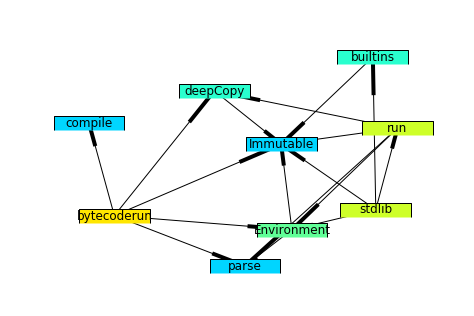

['run', 'bytecoderun', 'builtins', 'Environment', 'stdlib', 'deepCopy']


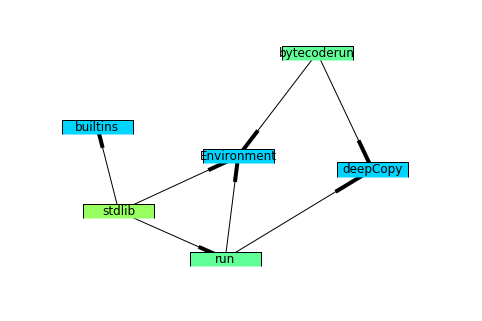

['run', 'stdlib']


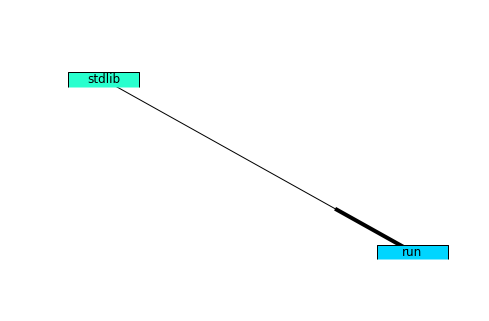

In [49]:
graph(without_tests(get_deps()))
graph(remove_leaves(without_tests(get_deps())))
graph(remove_leaves(remove_leaves(without_tests(get_deps()))))